# NLTK Chapter 3

## Processing Raw Text

*The html version of this page is available [here](https://www.nltk.org/book/ch03.html "ch03").*





In [1]:
# need to be called from this point on in the book

import nltk, re, pprint
from nltk import word_tokenize

#### 3.1 Accessing Text from the Web and from Disk

*Getting from Project Gutenburg text number 2554, which is an English translation of __Crime and Punishment__:*

In [2]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)

# this line is different from the book
# we need to decode without byte order mark (BOM)
# so use this encoding instead

raw = response.read().decode('utf-8-sig') 
type(raw)

str

*Slightly different from the book's answer:*

In [3]:
len(raw)

1176811

In [4]:
raw[:75]

'The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n'

*Tokenizing the text:*

In [5]:
tokens = word_tokenize(raw)
type(tokens)

list

In [6]:
len(tokens)

257058

In [7]:
print(tokens[:10], end = '')

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by']

*Converting to an NLTK text:*

In [8]:
text = nltk.Text(tokens)

In [9]:
type(text)

nltk.text.Text

In [10]:
print(text[1024:1062], end = '')

['insight', 'impresses', 'us', 'as', 'wisdom', '...', 'that', 'wisdom', 'of', 'the', 'heart', 'which', 'we', 'seek', 'that', 'we', 'may', 'learn', 'from', 'it', 'how', 'to', 'live', '.', 'All', 'his', 'other', 'gifts', 'came', 'to', 'him', 'from', 'nature', ',', 'this', 'he', 'won', 'for']

In [11]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


*Getting rid of header and footer:*

In [12]:
raw.find("PART I")

5574

*This returns `-1`, which means the search failed:*

In [13]:
raw.rfind("End of Gutenberg's Crim")

-1

*The reason is because older Project Gutenberg texts often use curly single quotes `’`, which are not used in many modern systems.*

In [15]:
raw.rfind("End of Project Gutenberg’s Crime")

-1

In [16]:
raw = raw[5335:1157811]
raw.find("PART I")

239

##### Dealing with HTML

In [17]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

*All the HTML content:*

In [18]:
print(html)

<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html>
<head>
<title>BBC NEWS | Health | Blondes 'to die out in 200 years'</title>
<meta name="keywords" content="BBC, News, BBC News, news online, world, uk, international, foreign, british, online, service">
<meta name="OriginalPublicationDate" content="2002/09/27 11:51:55">
<meta name="UKFS_URL" content="/1/hi/health/2284783.stm">
<meta name="IFS_URL" content="/2/hi/health/2284783.stm">
<meta name="HTTP-EQUIV" content="text/html;charset=iso-8859-1">
<meta name="Headline" content="Blondes 'to die out in 200 years'">
<meta name="Section" content="Health">
<meta name="Description" content="Natural blondes are an endangered species and will die out by 2202, a study suggests.">
<!-- GENMaps-->
<map name="banner">
<area alt="BBC NEWS" coords="7,9,167,32" href="http://news.bbc.co.uk/1/hi.html" shape="RECT">
</map>

<script src="/nol/shared/js/livestats_v1_1.js" language="JavaScript" t

*We can use __BeautifulSoup__ to get text out of HTML:*

In [19]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
print(tokens, end = '')

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'NEWS', 'SPORT', 'WEATHER', 'WORLD', 'SERVICE', 'A-Z', 'INDEX', 'SEARCH', 'You', 'are', 'in', ':', 'Health', 'News', 'Front', 'Page', 'Africa', 'Americas', 'Asia-Pacific', 'Europe', 'Middle', 'East', 'South', 'Asia', 'UK', 'Business', 'Entertainment', 'Science/Nature', 'Technology', 'Health', 'Medical', 'notes', '--', '--', '--', '--', '--', '--', '-', 'Talking', 'Point', '--', '--', '--', '--', '--', '--', '-', 'Country', 'Profiles', 'In', 'Depth', '--', '--', '--', '--', '--', '--', '-', 'Programmes', '--', '--', '--', '--', '--', '--', '-', 'SERVICES', 'Daily', 'E-mail', 'News', 'Ticker', 'Mobile/PDAs', '--', '--', '--', '--', '--', '--', '-', 'Text', 'Only', 'Feedback', 'Help', 'EDITIONS', 'Change', 'to', 'UK', 'Friday', ',', '27', 'September', ',', '2002', ',', '11:51', 'GMT', '12:51', 'UK', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'Scientists', 'believe', 'the', 'last', 'blond

*Using trial and error to find the start/finish of the text.  Again, the indices given in the book are not correct.*

In [20]:
tokens = tokens[111:403]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


##### Processing Search Engine Results

*__Your Turn__: Search the web for `"the of"` (inside quotes). Based on the large count, can we conclude that the of is a frequent collocation in English?*

*I got 165,000,000 results, which of course would be different than the number that the authors got while they were writing the book.*

*Despite the high number, it would be very wrong to assume "the of" is a common English collocation.  A large percentage of the hits were the result of transposition errors in the text: e.g. someone might type "the of point this..." when they meant to type "the point of this..."; another large contingent of results were phrases where 'the' and 'of' were separated by punctuation (e.g., "the # of"), which was presumably ignored by the search engine.  However, it has to be said that the vast majority of results did not feature "the of" in the summary, leading me to belief that Google does not always look at literal strings (i.e., strings inside quotes) when ranking results.*

##### Processing RSS Feeds

In [22]:
import feedparser

llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
llog['feed']['title']

'Language Log'

In [23]:
len(llog.entries)

13

In [24]:
post = llog.entries[2]
post.title

'AI without human oversight'

In [25]:
content = post.content[0].value
content[:70]

"<p>Despite the panic over AI we're seeing in many sectors of society, "

In [26]:
raw = BeautifulSoup(content, 'html.parser').get_text()
print(word_tokenize(raw)[:50], end = '')

['Despite', 'the', 'panic', 'over', 'AI', 'we', "'re", 'seeing', 'in', 'many', 'sectors', 'of', 'society', ',', 'including', 'academia', ',', 'the', 'juggernaut', 'rolls', 'on', ',', 'seeming', 'set', 'to', 'crush', 'everything', 'in', 'its', 'way', ':', "''", 'EU', 'gives', 'more', 'power', 'to', 'AI', 'translation', 'machines', "''", 'The', 'European', 'Commission', 'has', 'launched', 'a', 'pilot', 'project', 'to']

##### Reading Local Files

In [27]:
import os

# path = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk"
# os.chdir(path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk'

*__Your Turn:__ Create a file called `document.txt` using a text editor, and type in a few lines of text, and save it as plain text. If you are using IDLE, select the __New Window__ command in the File menu, typing the required text into this window, and then saving the file as `document.txt` inside the directory that IDLE offers in the pop-up dialogue box. Next, in the Python interpreter, open the file using `f = open('document.txt')`, then inspect its contents using `print(f.read())`.*

In [33]:
f = open('data/doc.txt')
print(f.read())

# f = open('document.txt', 'rU')
# for line in f:
#     print line.strip()

# path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
# raw = open(path, 'rU').read()


dddd


##### Extracting Text from PDF, MSWord and other Binary Formats

*__No notes__*

##### Capturing User Input



In [30]:
s = input("Enter some text: ")

In [31]:
print("You typed", len(word_tokenize(s)), "words.")

You typed 3 words.


*It seems the `?` was tokenized and counted as a word.*

##### The NLP Pipeline

In [32]:
from IPython.display import display, Image

display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\pipeline1.png"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\pipeline1.png'

In [ ]:
# raw = open('document.txt').read()
# print(type(raw))
# When we tokenize a string we produce a list (of words), and this is Python’s <list> type. Normalizing and sorting lists produces other lists:
# tokens = nltk.word_tokenize(raw)
# print(type(tokens))
# words = [w.lower() for w in tokens]
# print(type(words))
# vocab = sorted(set(words))
# print(type(vocab))

# vocab.append('blog')
# raw.append('blog') # causes error

# # Similarly, we can concatenate strings with strings, and lists with lists, but we cannot concatenate strings with lists:
# query = 'Who knows?'
# beatles = ['john', 'paul', 'george', 'ringo']
# query + beatles
# # Traceback (most recent call last):
# # File "<stdin>", line 1, in <module>
# # TypeError: cannot concatenate 'str' and 'list' objects

#### 3.2 Strings: Text Processing at the Lowest Level

##### Basic Operations with Strings

*Use `\` or `( )` to extend a string over several lines:*

In [37]:
monty = 'Monty Python'
print(monty)
circus = "Monty Python's Flying Circus"
print(circus)
circus = 'Monty Python\'s Flying Circus'
print(circus)
# circus = 'Monty Python's Flying Circus'
# File "<stdin>", line 1
# circus = 'Monty Python's Flying Circus'

couplet =   "When I was a little bitty boy" \
            "My grandmother bought me a cute little toy" 
print(couplet)

Monty Python
Monty Python's Flying Circus
Monty Python's Flying Circus
When I was a little bitty boyMy grandmother bought me a cute little toy


In [38]:
couplet =   ("Silver bells hanging on a string" 
            "She told me it was my ding-a-ling-a-ling")

print(couplet)

Silver bells hanging on a stringShe told me it was my ding-a-ling-a-ling


*To get a newline between the lines we should use a triple-quoted string:*

In [39]:
couplet = """You know, then mama took me to Sunday school
They tried to teach me the golden rule"""
print(couplet)

You know, then mama took me to Sunday school
They tried to teach me the golden rule


<i>__Your Turn__: Try running the following code, then try to use your understanding of the string `+` and `*` operations to figure out how it works. Be careful to distinguish between the string `' '`, which is a single whitespace character, and `''`, which is the empty string.</i>

In [40]:
print('very' * 3)
print('very' + 'very' + 'very')

a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b = [' ' * 2 * (7 - i) + 'very' * i for i in a]
for line in b:
     print(line)

veryveryvery
veryveryvery
            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


In [41]:
# 'very' - 'y'
# Traceback (most recent call last):
# File "<stdin>", line 1, in <module>
# TypeError: unsupported operand type(s) for -: 'str' and 'str'
# 'very' / 2
# Traceback (most recent call last):
# File "<stdin>", line 1, in <module>
# TypeError: unsupported operand type(s) for /: 'str' and 'int'


##### Printing Strings

*__No notes.__*

##### Accessing Individual Characters

*Frequency Distribution of individual characters in a text:*

In [44]:
monty = 'Monty Python'
grail = 'Holy Grail'
print(monty + grail)
print(monty, grail)
print(monty, "and the", grail)

print(monty[0])
print(monty[3])
print(monty[5])
# print(monty[20]) # causes error

print(monty[-1])
print(monty[5])
print(monty[-7])

sent = 'colorless green ideas sleep furiously'
for char in sent:
    print(char, end = '')


Monty PythonHoly Grail
Monty Python Holy Grail
Monty Python and the Holy Grail
M
t
 
n
 
 
colorless green ideas sleep furiously

In [45]:
from nltk.corpus import gutenberg
raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)

[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]

In [46]:
print([char for (char, count) in fdist.most_common()], end = '')

['e', 't', 'a', 'o', 'n', 'i', 's', 'h', 'r', 'l', 'd', 'u', 'm', 'c', 'w', 'f', 'g', 'p', 'b', 'y', 'v', 'k', 'q', 'j', 'x', 'z']

*As a plot:*

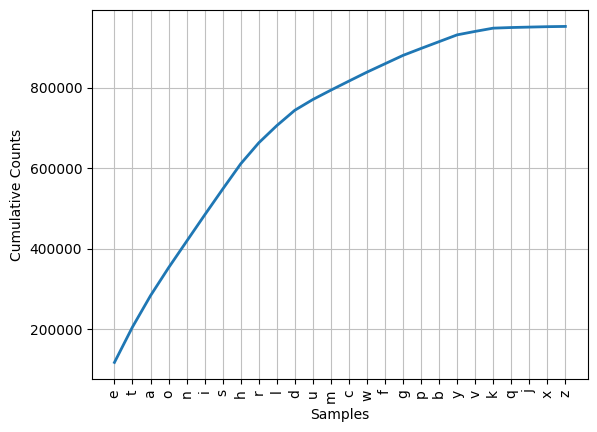

In [47]:
%matplotlib inline
fdist.plot(cumulative = True);

##### Accessing Substrings

*__Your Turn__: Make up a sentence and assign it to a variable, e.g. `sent = 'my sentence...'`. Now write slice expressions to pull out individual words. (This is obviously not a convenient way to process the words of a text!)*

In [48]:
print(monty[6:10])
print(monty[-12:-7])
print(monty[:5])
print(monty[6:])



Pyth
Monty
Monty
Python


In [53]:

sent = "I cut down trees, I eat my lunch, I go to the lavatory. " \
       "On Wednesdays I go shopping, and have buttered scones for tea."

spaces = []
for ch in range(len(sent)):
    if sent[ch] == " ":
        spaces.append(ch)
        
spaces.append(len(sent))

print(sent[0:2])

for s in range(len(spaces) - 1):
    print(sent[spaces[s] + 1:spaces[s + 1]])

print(sent.find("shopping"))

I 
cut
down
trees,
I
eat
my
lunch,
I
go
to
the
lavatory.
On
Wednesdays
I
go
shopping,
and
have
buttered
scones
for
tea.
75


##### More operations on strings

|       Method      |                            Functionality                            |
|:------------------|:--------------------------------------------------------------------|
| `s.find(t)`       | index of first instance of   string `t` inside `s` (`-1` if not found)    |
| `s.rfind(t)`      | index of last instance of   string `t` inside `s` (`-1` if not found)     |
| `s.index(t)`      | like `s.find(t)` except it raises `ValueError` if not   found           |
| `s.rindex(t)`     | like `s.rfind(t)` except it raises `ValueError` if not   found          |
| `s.join(text)`    | combine the words of the text into a string using `s` as the glue     |
| `s.split(t)`      | split `s` into a list wherever a `t` is found (whitespace   by default) |
| `s.splitlines()`  | split `s` into a list of strings, one per line                        |
| `s.lower()`       | a lowercased version of the string `s`                                |
| `s.upper()`       | an uppercased version of the string `s`                               |
| `s.title()`       | a titlecased version of the string `s`                                |
| `s.strip()`       | a copy of `s` without leading or trailing whitespace                  |
| `s.replace(t, u)` | replace instances of `t` with `u` inside `s`                              |


##### The Difference between Lists and Strings

*__No Notes.__*

#### 3.3 Text Processing with Unicode

##### What is Unicode?



In [54]:


display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\unicode.png"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\unicode.png'

In [57]:
# The difference Between Lists and Strings
query = 'Who knows?'
beatles = ['John', 'Paul', 'George', 'Ringo']
print(query[2])
print(beatles[2])
print(query[:2])
print(beatles[:2])
print(query + " I don't")
# print(beatles + 'Brian') # causes error
print(beatles + ['Brian'])

beatles[0] = 'John Lennon'
print(beatles)
del beatles[-1]
print(beatles)

# Strings are immutable
query[0] = 'F'
# Traceback (most recent call last):
# File "<stdin>", line 1, in <module>
# TypeError: 'str' object does not support item assignment


o
George
Wh
['John', 'Paul']
Who knows? I don't
['John', 'Paul', 'George', 'Ringo', 'Brian']


##### Extracting encoded text from files

In [55]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

In [58]:
f = open(path, encoding = 'latin2')
for line in f:
    line = line.strip()
    print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


*Converting all non-ASCII characters into two-digit \xXX and four-digit \uXXXX representations:*

In [60]:
f = open(path, encoding = 'latin2')
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

import codecs
ff = codecs.open(path, encoding='latin2')
print(ff)

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


*Getting the integer ordinal of a character:*

In [61]:
ord('ń')

324

*Converting hexadecimal to 4 digit notation:*

In [62]:
hex(324)

'0x144'

*Print 4 digit notation:*

In [63]:
nacute = '\u0144'
nacute

'ń'

*To see the representation of bytes:*

In [67]:
print(nacute.encode('utf8'))
nacute_utf = nacute.encode('utf8')
print(nacute_utf)
print(repr(nacute_utf))
print(nacute_utf.decode('utf8'))


b'\xc5\x84'
b'\xc5\x84'
b'\xc5\x84'
ń


*We can use the module `unicodedata` to inspect the properties of Unicode characters.  Here are the Polish characters outside the ASCII range in the text above:*

In [68]:
import unicodedata
lines = open(path, encoding = 'latin2').readlines()
line = lines[2]
print(line.encode('unicode_escape'))

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [69]:
for c in line:
    if ord(c) > 127:
        print("{} U+{:04x} {}".format(c.encode('utf8'), ord(c), unicodedata.name(c)))

b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


*With UTF-8:*

In [70]:
for c in line:
    if ord(c) > 127:
        print("{} U+{:04x} {}".format(c, ord(c), unicodedata.name(c)))

ó U+00f3 LATIN SMALL LETTER O WITH ACUTE
ś U+015b LATIN SMALL LETTER S WITH ACUTE
Ś U+015a LATIN CAPITAL LETTER S WITH ACUTE
ą U+0105 LATIN SMALL LETTER A WITH OGONEK
ł U+0142 LATIN SMALL LETTER L WITH STROKE


*Using `re` with Unicode characters:*

In [71]:
line.find('zosta\u0142y')

54

In [72]:
line = line.lower()
line

'niemców pod koniec ii wojny światowej na dolny śląsk, zostały\n'

In [73]:
line.encode('unicode_escape')

b'niemc\\xf3w pod koniec ii wojny \\u015bwiatowej na dolny \\u015bl\\u0105sk, zosta\\u0142y\\n'

In [74]:
m = re.search('\u015b\w*', line)
m.group()

'światowej'

*NLTK tokenizers also work with Unicode strings:*

In [75]:
print(word_tokenize(line), end = '')

['niemców', 'pod', 'koniec', 'ii', 'wojny', 'światowej', 'na', 'dolny', 'śląsk', ',', 'zostały']

##### Using your local encoding in Python

*__No notes.__*

#### 3.4   Regular Expressions for Detecting Word Patterns

*We'll use the Words Corpus, but we need to remove proper names:*

In [76]:
wordlist = [w for w in nltk.corpus.words.words('en') if w.lower()]

##### Using Basic Meta-Characters

*Using RegEx to find the first fify words ending with __ed__:*

In [77]:
print([w for w in wordlist if re.search('ed$', w)][:50], end = '')

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded', 'absorbed', 'abstracted', 'abstricted', 'accelerated', 'accepted', 'accidented', 'accoladed', 'accolated', 'accomplished', 'accosted', 'accredited', 'accursed', 'accused', 'accustomed', 'acetated', 'acheweed', 'aciculated', 'aciliated', 'acknowledged', 'acorned', 'acquainted', 'acquired', 'acquisited', 'acred', 'aculeated', 'addebted', 'added', 'addicted', 'addlebrained', 'addleheaded', 'addlepated', 'addorsed', 'adempted', 'adfected', 'adjoined', 'admired', 'admitted', 'adnexed', 'adopted', 'adossed']

*Using `.` as a __wildcard__ to find 8-letter words whose respective third and sixth letters are __j__ and __t__:* 

In [78]:
print([w for w in wordlist if re.search('^..j..t..$', w)])

['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic', 'objectee', 'objector', 'rejecter', 'rejector', 'unjilted', 'unjolted', 'unjustly']


*__Your Turn:__ The caret symbol `^` matches the start of a string, just like the `$` matches the end. What results do we get with the above example if we leave out both of these, and search for `«..j..t..»`?

In [79]:
print([w for w in wordlist if re.search('..j..t..', w)][:50])

['abjectedness', 'abjection', 'abjective', 'abjectly', 'abjectness', 'adjection', 'adjectional', 'adjectival', 'adjectivally', 'adjective', 'adjectively', 'adjectivism', 'adjectivitis', 'adjustable', 'adjustably', 'adjustage', 'adjustation', 'adjuster', 'adjustive', 'adjustment', 'antejentacular', 'antiprojectivity', 'bijouterie', 'coadjustment', 'cojusticiar', 'conjective', 'conjecturable', 'conjecturably', 'conjectural', 'conjecturalist', 'conjecturality', 'conjecturally', 'conjecture', 'conjecturer', 'coprojector', 'counterobjection', 'dejected', 'dejectedly', 'dejectedness', 'dejectile', 'dejection', 'dejectly', 'dejectory', 'dejecture', 'disjection', 'guanajuatite', 'inadjustability', 'inadjustable', 'injectable', 'injection']


*The result will be all words of at least eight letters with at least two letters before a __j__, two additional letters, a __t__, and at least two more letters.*

*The `?` means the preceding character is optional.  The following code will find all the words with __judg__ or __judge__ in the wordlist:*

In [81]:
print([w for w in wordlist if re.search('judge?', w)])

['abjudge', 'adjudge', 'adjudgeable', 'adjudger', 'adjudgment', 'cojudge', 'counterjudging', 'forejudge', 'forejudgment', 'forjudge', 'forjudger', 'interjudgment', 'judge', 'judgeable', 'judgelike', 'judger', 'judgeship', 'judgingly', 'judgmatic', 'judgmatical', 'judgmatically', 'judgment', 'misjudge', 'misjudgement', 'misjudger', 'misjudgingly', 'misjudgment', 'overjudge', 'overjudging', 'overjudgment', 'prejudge', 'prejudgement', 'prejudger', 'prejudgment', 'rejudge', 'stockjudging', 'subjudge', 'unadjudged', 'underjudge', 'unjudgable', 'unjudge', 'unjudged', 'unjudgelike', 'unjudging', 'unprejudged']


##### Ranges and Closures

*The T9 system of entering text on older mobile phones:*

In [80]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\T9.png"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\T9.png'

*Finding words that could have been written with the sequence 4653:*

In [82]:
print([w for w in wordlist if re.search('^[ghi][mno][jkl][def]$', w)])

['gold', 'golf', 'hold', 'hole']


*__Your Turn:__ Look for some "finger-twisters", by searching for words that only use part of the number-pad. For example `«^[ghijklmno]+$»`, or more concisely, `«^[g-o]+$»`, will match words that only use keys 4, 5, 6 in the center row, and `«^[a-fj-o]+$»` will match words that use keys 2, 3, 5, 6 in the top-right corner. What do `-` and `+` mean?*

*`-` is used for a range of letters: e.g., `a-d` would be the same as `abcd`; `+` means 1 or more of the previous: e.g., `[a-c]+` would be one or more of any combination of the letters `a`, `b`, and `c`.*

*I tried to automate as much as possible with iterators.  Detailed notes are above the code in the cell below;*

In [85]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
print([w for w in chat_words if re.search('^m+i+n+e+$', w)])
print([w for w in chat_words if re.search('^[ha]+$', w)])

wsj = sorted(set(nltk.corpus.treebank.words()))
print([w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)])
print([w for w in wsj if re.search('^[A-Z]+\$$', w)])
print([w for w in wsj if re.search('^[0-9]{4}$', w)])
print([w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)])
print([w for w in wsj if re.search('(ed|ing)$', w)])
print([w for w in wsj if re.search('ed|ing$', w)])


['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee', 'miiiiiinnnnnnnnnneeeeeeee', 'mine', 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']
['a', 'aaaaaaaaaaaaaaaaa', 'aaahhhh', 'ah', 'ahah', 'ahahah', 'ahh', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'h', 'ha', 'haaa', 'hah', 'haha', 'hahaaa', 'hahah', 'hahaha', 'hahahaa', 'hahahah', 'hahahaha', 'hahahahaaa', 'hahahahahaha', 'hahahahahahaha', 'hahahahahahahahahahahahahahahaha', 'hahahhahah', 'hahhahahaha']
['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5', '0.50', '0.54', '0.56', '0.60', '0.7', '0.82', '0.84', '0.9', '0.95', '0.99', '1.01', '1.1', '1.125', '1.14', '1.1650', '1.17', '1.18', '1.19', '1.2', '1.20', '1.24', '1.25', '1.26', '1.28', '1.35', '1.39', '1.4', '1.457', '1.46', '1.49', '1.5', '1.50', '1.55', '1.56', '1.5755', '1.5805', '1.6', '1.61', '1.637', '1.64', '1.65', '1.7', '1.75', '1.76', '1.8', '1.82', '1.8415', '1.85', '1.8500', '1.9', '1.916', '1.92', '10.19', '10.2', '10.5', '107.03', '107.9', '10

In [86]:
# Quickest way to get a string of the lowercase letters
import string

abc = list(string.ascii_lowercase)

# Make a nested list matching the letters to the numbers in the T9 system.
# For the sake of consistency, I'll add two empty lists for 0 (because Python
# is zero indexed) and 1 (because it has no letters in the T9 system)
T9 = [[], []]
for i in range(2, 10):
    # most numbers have three letters assigned to them
    k = 3
    # but 7 and 9 have four 
    if i in (7, 9):
        k = 4
    l = ""
    for j in range(0, k):
        l += (abc.pop(0))
    T9.append([l])

# Names of the different combinations:
# Not strictly necessary, but it looks nicer when we print everything
names = ["top row", "middle row", "bottom row", "left column", "middle column",
         "right column", "top left corner", "top right corner", 
         "bottom left corner", "bottom right corner"]
    
# numbers in the different combinations
combos = [[2, 3], [4, 5, 6], [7, 8, 9], [4, 7], [2, 5, 8], [3, 6, 9], [2, 4, 5], [2, 3, 5, 6],
 [4, 5, 7, 8], [5, 6, 8, 9]]

# create strings of candidate letters for each combination
candidate_letters = []
for c in combos:
    search_string = ''
    for n in c:
        search_string += T9[n][0]
    candidate_letters.append(search_string)

# search over each of the strings of candidate letters
for i in range(len(combos)):
    print("\n'finger-twisters' for", names[i] +": \n")

    # excluding results that are shorter than the number of keys
    print([w for w in wordlist if re.search('^[' + candidate_letters[i] + ']+$', w) and len(w) >= len(combos[i])])


'finger-twisters' for top row: 

['aa', 'aba', 'abac', 'abaca', 'abaff', 'abb', 'abed', 'acca', 'accede', 'ace', 'ad', 'adad', 'add', 'adda', 'added', 'ade', 'adead', 'ae', 'aface', 'affa', 'ba', 'baa', 'baba', 'babe', 'bac', 'bacaba', 'bacca', 'baccae', 'bad', 'bade', 'bae', 'baff', 'be', 'bead', 'beaded', 'bebed', 'bed', 'bedad', 'bedded', 'bedead', 'bedeaf', 'bee', 'beef', 'ca', 'cab', 'caba', 'cabda', 'cad', 'cade', 'caeca', 'caffa', 'ce', 'cede', 'cee', 'da', 'dab', 'dabb', 'dabba', 'dace', 'dad', 'dada', 'dade', 'dae', 'daff', 'de', 'dead', 'deaf', 'deb', 'decad', 'decade', 'dee', 'deed', 'deedeed', 'deface', 'ea', 'ebb', 'ecad', 'edea', 'efface', 'fa', 'facade', 'face', 'faced', 'fad', 'fade', 'faded', 'fae', 'faff', 'fe', 'fed', 'fee', 'feed']

'finger-twisters' for middle row: 

['ghoom', 'gig', 'giggling', 'gigolo', 'gilim', 'gill', 'gilling', 'gilo', 'gim', 'gin', 'ging', 'gingili', 'gink', 'ginkgo', 'ginning', 'gio', 'glink', 'glom', 'glonoin', 'gloom', 'glooming', 'gnomon

*Examples of __Kleene closures__:*

In [87]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [88]:
print([w for w in chat_words if re.search('^[ha]+$', w)])

['a', 'aaaaaaaaaaaaaaaaa', 'aaahhhh', 'ah', 'ahah', 'ahahah', 'ahh', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'h', 'ha', 'haaa', 'hah', 'haha', 'hahaaa', 'hahah', 'hahaha', 'hahahaa', 'hahahah', 'hahahaha', 'hahahahaaa', 'hahahahahaha', 'hahahahahahaha', 'hahahahahahahahahahahahahahahaha', 'hahahhahah', 'hahhahahaha']


*A `^` inside square brackets means to exclude everything with these characters.  `<<^[^aeiouAEIOU]+$>>` would match everything without a vowel:*

In [89]:
print([w for w in chat_words if re.search('^[^aeiouAEIOU]+$', w)])

['!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!', '!!!!!!!', '!!!!!!!!', '!!!!!!!!!', '!!!!!!!!!!', '!!!!!!!!!!!', '!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!.', '!!!!!.', '!!!!....', '!!!.', '!!.', '!!...', '!.', '!...', '!=', '!?', '!??', '!???', '"', '"...', '"?', '"s', '#', '###', '####', '$', '$$', '$27', '&', '&^', "'", "''", "'.", "'d", "'ll", "'m", "'n'", "'s", '(', '(((', '((((', '(((((', '((((((', '(((((((', '((((((((', '(((((((((', '((((((((((', '(((((((((((', '((((((((((((', '(((((((((((((', '((((((((((((((', '(((((((((((((((', '(((((((((((((((((', '((((((((((((((((((', '((((((((((((((((((((', '(((((((((((((((((((((', '(((((((((((((((((((((((', '((((((((((((((((((((((((', '(((((((((((((((((((((((((', '((((((((((((((((((((((((((', '(((((..', '(*&(^', '(.', ')', ')))', '))))', ')))))', ')))))))', '))))))))',

*__Your Turn:__ Study the ~~above~~ __(below)__ examples and try to work out what the `\`, `{}`, `()`, and `|` notations mean before you read on.*

In [90]:
wsj = sorted(set(nltk.corpus.treebank.words()))
print([w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)][:50])

['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5', '0.50', '0.54', '0.56', '0.60', '0.7', '0.82', '0.84', '0.9', '0.95', '0.99', '1.01', '1.1', '1.125', '1.14', '1.1650', '1.17', '1.18', '1.19', '1.2', '1.20', '1.24', '1.25', '1.26', '1.28', '1.35', '1.39', '1.4', '1.457', '1.46', '1.49', '1.5', '1.50', '1.55', '1.56', '1.5755', '1.5805', '1.6', '1.61', '1.637', '1.64']


In [91]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

['C$', 'US$']

*`\` is used as an escape character.  Normally, `.` is a wildcard character and `$` is used to designate the end of a string.  Here we'd like to search for strings composed of numbers with a decimal and for alphabetic strings with a dollar sign, so we need to escape the characters.*

In [92]:
print([w for w in wsj if re.search('^[0-9]{4}$', w)])

['1614', '1637', '1787', '1901', '1903', '1917', '1925', '1929', '1933', '1934', '1948', '1953', '1955', '1956', '1961', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1975', '1976', '1977', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2005', '2009', '2017', '2019', '2029', '3057', '8300']


In [93]:
print([w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)])

['10-day', '10-lap', '10-year', '100-share', '12-point', '12-year', '14-hour', '15-day', '150-point', '190-point', '20-point', '20-stock', '21-month', '237-seat', '240-page', '27-year', '30-day', '30-point', '30-share', '30-year', '300-day', '36-day', '36-store', '42-year', '50-state', '500-stock', '52-week', '69-point', '84-month', '87-store', '90-day']


In [94]:
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

*`{ }` are used to restrict the size of the returned hits. `{n}` means only those strings of length $n$.  `{n,}` means those strings at least as long as $n$.  `{,n}` means those strings no longer than $n$.*

In [95]:
print([w for w in wsj if re.search('(ed|ing)$', w)][:50])

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything', 'Arbitrage-related', 'Arbitraging', 'Asked', 'Assuming', 'Atlanta-based', 'Baking', 'Banking', 'Beginning', 'Beijing', 'Being', 'Bermuda-based', 'Betting', 'Boeing', 'Broadcasting', 'Bucking', 'Buying', 'Calif.-based', 'Change-ringing', 'Citing', 'Concerned', 'Confronted', 'Conn.based', 'Consolidated', 'Continued', 'Continuing', 'Declining', 'Defending', 'Depending', 'Designated', 'Determining', 'Developed', 'Died', 'During', 'Encouraged', 'Encouraging', 'English-speaking', 'Estimated', 'Everything', 'Excluding', 'Exxon-owned']


*The `|` means to match either of these strings.  When used with parentheses, it can be combined with other operators.  E.g., in the example above `'(ed|ing)$'` returns strings that end with either `ed` or `ing`.  But without the parenthesis, the `$` operator is attached only to `ing`, so the code below will find strings that have `ed` anywhere within their string, or `ing` at their end.*

In [96]:
print([w for w in wsj if re.search('ed|ing$', w)][:50])

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything', 'Arbitrage-related', 'Arbitraging', 'Asked', 'Assuming', 'Atlanta-based', 'Baking', 'Banking', 'Beginning', 'Beijing', 'Being', 'Bermuda-based', 'Betting', 'Biedermann', 'Boeing', 'Breeden', 'Broadcasting', 'Bucking', 'Buying', 'Calif.-based', 'Cathedral', 'Cedric', 'Change-ringing', 'Citing', 'Concerned', 'Confederation', 'Confronted', 'Conn.based', 'Consolidated', 'Continued', 'Continuing', 'Credit', 'Declining', 'Defending', 'Depending', 'Designated', 'Determining', 'Developed', 'Died', 'During', 'Encouraged']


*__Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures__*

| Operator        | Behavior                                                 |
|:-----------|:--------------------------------------------------------------------------------|
| `.`        | Wildcard, matches any character                                                 |
| `^abc`     | Matches some pattern $abc$ at the start of a string                               |
| `abc$`     | Matches some pattern $abc$ at the end of a string                                 |
| `[abc]`    | Matches one of a set of characters                                              |
| `[A-Z0-9]` | Matches one of a range of characters                                            |
| `ed|ing|s` | Matches one of the specified strings (disjunction)                              |
| `*`        | Zero or more of previous item, e.g. `a*`, `[a-z]*` (also known   as $Kleene Closure$) |
| `+`        | One or more of previous item, e.g. `a+`, `[a-z]+`                                   |
| `?`        | Zero or one of the previous item (i.e. optional),   e.g. `a?`, `[a-z]?`             |
| `{n}`      | Exactly $n$ repeats where $n$ is a non-negative integer                             |
| `{n,}`     | At least $n$ repeats                                                              |
| `{,n}`     | No more than $n$ repeats                                                          |
| `{m,n}`    | At least $m$ and no more than $n$ repeats                                           |
| `a(b|c)+`  | Parentheses that indicate the scope of the operators                            |
|            |                                                                                 |

#### 3.5   Useful Applications of Regular Expressions

*Using `re.findall()` to find and count the vowels in a word:*

In [97]:
word = 'supercalifragilisticexpialidocious'
print(re.findall(r'[aeiou]', word))

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']


In [98]:
len(re.findall(r'[aeiou]', word))

16

*If we only want the number of hits, we can also use this:*

In [99]:
sum([1 for r in re.findall(r'[aeiou]', word)])

16

*Sequences of two or more vowels and their relative frequencies:*

In [100]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                   for vs in re.findall(r'[aeiou]{2,}', word))
print(fd.most_common(12))

[('io', 549), ('ea', 476), ('ie', 331), ('ou', 329), ('ai', 261), ('ia', 253), ('ee', 217), ('oo', 174), ('ua', 109), ('au', 106), ('ue', 105), ('ui', 95)]


*__Your Turn:__ In the W3C Date Time Format, dates are represented like this: 2009-12-31. Replace the `?` in the following Python code with a regular expression, in order to convert the string `'2009-12-31'` to a list of integers `[2009, 12, 31]`:

`[int(n) for n in re.findall(?, '2009-12-31')]`

In [101]:
[int(n) for n in re.findall(r'[0-9]{2,}', '2009-12-31')]

[2009, 12, 31]

##### Doing More with Word Pieces

*Removing internal vowels from a text:*

In [102]:
regexp = r'^[AEIOUaeiou]+|[^AEIOUaeiou]|[AEIOUaeiou]+$'
def compres(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compres(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


*Finding frequencies of consonant-vowel sequences from the words of Rotokas:*

In [103]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


*Making an index of all possible consonant-vowel pairs in the language:*

In [104]:
cv_word_pairs = [(cv, w) for w in rotokas_words
                         for cv in re.findall(r'[ptksvr][aeiou]', w)]
cv_index = nltk.Index(cv_word_pairs)
cv_index['su']

['kasuari']

In [105]:
print(cv_index['po'])

['kaapo', 'kaapopato', 'kaipori', 'kaiporipie', 'kaiporivira', 'kapo', 'kapoa', 'kapokao', 'kapokapo', 'kapokapo', 'kapokapoa', 'kapokapoa', 'kapokapora', 'kapokapora', 'kapokaporo', 'kapokaporo', 'kapokari', 'kapokarito', 'kapokoa', 'kapoo', 'kapooto', 'kapoovira', 'kapopaa', 'kaporo', 'kaporo', 'kaporopa', 'kaporoto', 'kapoto', 'karokaropo', 'karopo', 'kepo', 'kepoi', 'keposi', 'kepoto']


##### Finding Word Stems

*A simple approach:*

In [106]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

*A step-by-step outline of how we could use RegExp:*

*Here's a disjunction of all the suffixes:*

In [107]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

*This just returns the suffix because the `( )` also selects which substring to return.  If we want the parentheses to specify the scope of the disjunction, but not select the material to be output, we have to add `?:`:*

In [108]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

*Since we want this split, we have to parenthesize both parts of the regular expression:*

In [109]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

*Let's try it with a different form of the word:*

In [110]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

*Star operators are by default greedy and will try to 'consume' as much of the input as possible.  We can turn this off with `*?`:*

In [112]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('process', 'es')]

*We can allow for empty strings by adding `?`:*

In [111]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

*Encasing this in a function:*

In [113]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

In [114]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
print([stem(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'ly', 'in', 'pond', 'distribut', 'sword', 'i', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'Supreme', 'execut', 'power', 'deriv', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


##### Searching Tokenized Text

*`<a> <man>` will find all instances of __a man__ in a text.  The angle brackets are used to mark token boundaries, and white space is ignored (this only applies to NLTK `findall()` method for texts.  Here, we'll look for all occurrences of "a _ _ _ man" in "Moby Dick".  The parentheses within the search term limits the returned string, so only the word between "a" and "man" is returned:*

In [115]:
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


*Now we'll look at the chat corpus and find three-word phrases ending with "bro":*

In [116]:
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*><.*><bro>")

you rule bro; telling you bro; u twizted bro


*This finds sequences of three or more words starting with __l__:*

In [117]:
chat.findall(r"<l.*>{3,}")

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


__Your Turn:__ Consolidate your understanding of regular expression patterns and substitutions using `nltk.re_show(p, s)` which annotates the string `s` to show every place where pattern `p` was matched, and `nltk.app.nemo()` which provides a graphical interface for exploring regular expressions. For more practice, try some of the exercises on regular expressions at the end of this chapter.

*For `nltk.re_show(p, s)`, `p` cannot be a regular expression (a fact which could have been made clearer...*

In [118]:
yogi = "When you come to a fork in the road, take it."
nltk.re_show(r"<f.*k>", yogi)

When you come to a fork in the road, take it.


In [119]:
nltk.re_show("fork", yogi)

When you come to a {fork} in the road, take it.


In [120]:
nltk.re_show("f.*k", yogi)

When you come to a {fork in the road, tak}e it.


*`nltk.app.nemo()` can be used in jupyter notebooks, but it opens an external window which will prevent the other cells in the notebook from running until it's closed. Therefore, I'm not going to call it in this notebook.*

*We can use RegExs to search for linguistic phenomena.  E.g., we can find hypernyms by looking for __x and other ys__:*

In [121]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories = ['hobbies', 'learned']))
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


*But this does result in false positives (e.g., "demands and other factors"), and can also result in false negitives.*

__Your Turn__: Look for instances of the pattern *as x as y* to discover information about entities and their properties.

In [122]:
brown_sample = nltk.Text(brown.words(categories=['humor', 'news']))
brown_sample.findall(r"<as> <\w*> <as> <\w*>")

as soon as possible; as well as the; as soon as possible; as long as
they; as well as representatives; as far as instructed; as long as
there; as late as the; as well as a; as much as we; as many as 25; as
many as 25; as thoroughly as the; as well as the; as well as his; as
great as Mankowski; as long as their; as soon as possible; as soon as
the; as early as the; as soon as trading; as well as its; as abrupt as
in; as severe as in; as well as to; as carefully as she; as well as
golden; as harmless as a; as far as a; as well as a; as good as those;
as automatically as it; as well as the; as long as one; as many as
six; as good as Hamilton; as large as Western; as hard as I; as much
as possible; as early as 1950; as well as bound; as many as a; as much
as the; as innocent as it; as well as wit; as much as my; as well as
wit; as funny as Ed; as fast as we


*A number of idioms tend to dominate the results (i.e., "as soon as possible", "as well as ..."), so let's remove theses.*

In [123]:
brown_sample = nltk.Text(brown.words(categories=['humor', 'news']))
brown_sample.findall(r"<as> <\w*[^well][^soon]> <as> <\w*>")

as long as they; as far as instructed; as long as there; as late as
the; as much as we; as many as 25; as many as 25; as great as
Mankowski; as long as their; as abrupt as in; as severe as in; as far
as a; as good as those; as long as one; as many as six; as good as
Hamilton; as large as Western; as hard as I; as much as possible; as
many as a; as much as the; as innocent as it; as much as my; as funny
as Ed; as fast as we


*We could also make the argument that most uses of "as long as ..." are also idiomatic and could be eliminated.  But this would lead to false negatives.*  

*I would also say that these results might be more useful if we could also see more of the phrase from which these results were taken:*

In [124]:
brown_sample = nltk.Text(brown.words(categories=['humor', 'news']))
brown_sample.findall(r"<as> <\w*[^well][^soon]> <as> <\w*>{2}")

as long as they can; as far as instructed so; as long as there is; as
late as the top; as much as we can; as many as 25 home; as many as 25
bases; as great as Mankowski did; as long as their names; as abrupt as
in 1958; as severe as in late; as far as a black; as good as those
elsewhere; as long as one pretends; as many as six strokes; as good as
Hamilton Holmes; as large as Western Europe; as hard as I could; as
many as a thousand; as much as the ambiguous; as innocent as it looks;
as much as my husband; as funny as Ed Wynn; as fast as we replenished


#### 3.6   Normalizing Text

##### Stemmers

The Porter and Lancaster stemmers:

In [125]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
print([porter.stem(t) for t in tokens])

['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']


In [126]:
print([lancaster.stem(t) for t in tokens])

['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


*Texts can be indexed using a stemmer, and from there concordances can be made:*

In [127]:
class IndexedText(object):
    
    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))
        
    def concordance(self, word, width = 40):
        key = self._stem(word)
        wc = int(width/4)
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i - wc : i])
            rcontext = ' '.join(self._text[i : i + wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width = width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width = width)
            print(ldisplay, rdisplay)
            
    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [128]:
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text.concordance('lie')

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t


##### Lemmatization

*The WordNet lemmatizer:*

In [129]:
wnl = nltk.WordNetLemmatizer()
print([wnl.lemmatize(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


### 3.7   Regular Expressions for Tokenizing Text

##### Simple Approaches to Tokenization

*Just splitting on whitespace with the string method `.split`:*

In [130]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

print(raw.split())


["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


*The regular expression is similar, but we need to add code so that it handles tabs and whitespaces:*

In [131]:
print(re.split(r' ', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone\nthough),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very\nwell', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [132]:
print(re.split(r'[ \t\n]+', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


*We can do this more easily with the built-in `re` abbreviation `\s`:*

In [133]:
print(re.split(r'\s+', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


*Remember that when regular expressions are prefixed with `r`, the Python interpreter will treat the string literally.*

*`\w` is the character class (equivalent to `[a-zA-Z0-9_]`), and the complement to this is `\W` (which seems very counter intuitive to me...).  We could use `\W` to split a text on anything but a word character:*

In [135]:
print(re.split(r'\W+', raw))

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


*But this leaves us with empty strings at the beginning and end.  We could avoid this by using `re.findall(r'\w+', raw)`:*

In [136]:
print(re.findall(r'\w+', raw))

['When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered']


*A more complicated RegEx will first try to match any sequence of word characters; if it can't find a match, it will use `\S` to find non-whitespace charcters.  In this way, punctuation is grouped with following letters, but sequences of punctuation will be separated:*

In [137]:
print(re.findall(r'\w+|\S\w*', raw))

["'When", 'I', "'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '-', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 'people', 'hot', '-tempered', ',', "'", '.', '.', '.']


*If we want to include internal hyphens and apostrophes, we could use this: `re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw)`.  `<<\w+(?:[-']\w+)*>>` means `\w+` followed by zero or more instances of `[-']\w+`, which matches strings like __hot-tempered__ and __it's__.  We have to include `?:` to return the entire string.  We also need to separate quote chatacters `|'|`, and `<<[-.(]+>>` will allow double hyphens, ellipses, etc... to be tokenized separately:*

In [138]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


######  Regular Expression Symbols


|Symbol| Function                                 |
|:-----|:-------------------------------------------------------------|
| `\b` | Word boundary (zero width)                                   |
| `\d` | Any decimal digit (equivalent to `[0-9]`)                     |
| `\D` | Any non-digit character (equivalent to `[^0-9]`)               |
| `\s` | Any whitespace character (equivalent to `[ \t\n\r\f\v]`)       |
| `\S` | Any non-whitespace character (equivalent to `[^ \t\n\r\f\v]`)  |
| `\w` | Any alphanumeric character (equivalent to `[a-zA-Z0-9_]`)      |
| `\W` | Any non-alphanumeric character (equivalent to `[^a-zA-Z0-9_]`) |
| `\t` | The tab character                                            |
| `\n` | The newline character                                        |

##### NLTK's Regular Expression Tokenizer

*`nltk.regexp_tokenizer()` is similar to `re.findall()`, but is more efficient, and avoids the need for special treatment of parentheses. The `(?x)` flag tells Python to strip out the embedded whitespace and comments:*

In [139]:
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)     # set flag to allow verbose regexps
    (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
  | \w+(?:-\w+)*       # words with optional internal hyphens
  | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
  | \.\.\.             # ellipsis
  | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
  '''
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

*If we use the verbose flag, we can't use `' '` to match a space character - we have to use `\s`.  Also, `regexp_tokenizer()` has an optional `gaps` parameter that specifies the gaps between tokens:*

*We can evaluate a tokenizer by seeing how many of the resulting tokens are not in a wordlist:*

In [140]:
tokens = [w.lower() for w in re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw)]
set(tokens).difference(wordlist)

{"'",
 '(',
 ')',
 ',',
 '--',
 '.',
 '...',
 'hot-tempered',
 "i'm",
 "it's",
 'makes',
 "won't"}

##### Further Issues with Tokenization

### 3.8 Sementation

##### Sentence Segmentation

*Average number of word per sentence in the Brown Corpus:*

In [141]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())

20.250994070456922

*Example of the Punkt sentence segmeneter:*

In [142]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


##### Word Segmentation

*Example of a joined text and a simple segmenter:*

In [162]:
def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last : i + 1])
            last = i + 1
    words.append(text[last:])
    return words

In [144]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"

In [145]:
segment(text, seg1)

['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']

In [146]:
print(segment(text, seg2))

['do', 'you', 'see', 'the', 'kitty', 'see', 'the', 'doggy', 'do', 'you', 'like', 'the', 'kitty', 'like', 'the', 'doggy']


*I've always found the explanation of the following to be a bit lacking.  The solution involves search, which is technically a machine learning topic.  Dealing with machine learning techniques just a couple chapters after covering Python basics such as printing strings and indexing is an incredible acceleration in the level of difficulty.  Suffice to say, the following section presents some functions that are __muuuuuuuuuuch__ too difficult for this part of the book.*

*The __TLDR__ version of the topic is this: it's possible to create an objective function and that will score a segmentation of a text.  The segmentation divides the string into a lexicon and a derivation that uses the words in this lexicon.  The smaller the lengths of the lexical items and the derivations, the better the score.*

In [147]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\brent.png"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\brent.png'

*The objective function looks quite straightforward:*

In [148]:
def evaluate(text, segs):
    words = segment(text, segs)
    text_size = len(words)
    lexicon_size = sum(len(word) + 1 for word in set(words))
    return text_size + lexicon_size

*We'll use the same text and segmentations as earlier, and add one more:*

In [149]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
seg3 = "0000100100000011001000000110000100010000001100010000001"
print(segment(text, seg3))

['doyou', 'see', 'thekitt', 'y', 'see', 'thedogg', 'y', 'doyou', 'like', 'thekitt', 'y', 'like', 'thedogg', 'y']


In [150]:
evaluate(text, seg1)

64

In [151]:
evaluate(text, seg2)

48

In [152]:
evaluate(text, seg3)

47

*The fact that the second segmentation - which represents the correct segmentation in natural English - has a lower score than the third - which segments "thekitty" and "thedoggy" respectively into ("thekitt", "y") and ("thedogg", "y") - is to me concerning.  Either this heuristic or the example are not ideal.  It's possible with a longer text, the heuristic could isolate "the". I feel the example would have been that much easier to follow if the authors had picked a sample that did this.*

*Next, we have to search for the optimal string segmentation.  The first function is simple enough: it just flips a binary digit at a given position;*

In [153]:
def flip(segs, pos):
    return segs[:pos] + str(1 - int(segs[pos])) + segs[pos + 1:]

In [155]:
seg = "11111"
flip(seg, 2)

'11011'

*The second function flips n digits at random positions:*

In [156]:
from random import randint

def flip_n(segs, n):
    for i in range(n):
        segs = flip(segs, randint(0, len(segs) - 1))
    return segs

In [157]:
seg = "11111111111"
flip_n(seg, 3)

'10111111111'

*It will almost certainly give different results every time it's called:*

In [158]:
seg = "11111111111"
flip_n(seg, 3)

'01010111111'

In [159]:
seg = "11111111111"
flip_n(seg, 3)

'01011111011'

*The third part is the clusterf\*^k.  The number of possible segmentation strings in $2^n$, where $n$ is the length of the text.  Since our text is 56 characters long, the number of possible segmentations would be 72,057,594,037,927,936.  To evaluate all of those would take years on most machines.*

*So the function below uses a technique called "annealing" (there's a decent wiki [here](https://en.wikipedia.org/wiki/Simulated_annealing "simulated annealing")).  Another __TLDR__ explanation:  instead of trying all 72,057,594,037,927,936 possibilities, we'll try a small subset - here, 5,000.  Then we'll take the best result of that subset, and use that for the basis of the next 5,000 trials.  At each step, the number of digits in our segmentation that is randomly flipped will become smaller and smaller, and as a result we'll slowly converge on a "good" estimate. (I say "good", because there's no guarantee we'll find the optimal solution).  The reference to "annealing" is because of our use of a "cooling rate" - a parameter that determines the speed at which we converge to our solution.  If the cooling rate is too high, we'll converge too quickly and the solution may not be very good; but if the rates too low, the convergence will be very slow.*

*And yes, if you're wondering, I'm in no way qualified to be instructing anyone about machine learning.  But take a look for yourself at the code, and you'll see that this is what basically happens:*

In [160]:
def anneal(text, segs, iterations, cooling_rate):
    temperature = float(len(segs))
    while temperature > 0.5:
        best_segs, best = segs, evaluate(text, segs)
        for i in range(iterations):
            guess = flip_n(segs, round(temperature))
            score = evaluate(text, guess)
            if score < best:
                best, best_segs = score, guess
        score, segs = best, best_segs
        temperature = temperature / cooling_rate
        print(evaluate(text, segs), segment(text, segs))
    print()
    return segs

In [161]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
59 ['doyous', 'ee', 'thekitty', 'se', 'ethedoggy', 'd', 'oyoul', 'ike', 'thekitty', 'lik', 'ethedoggy']
59 ['doyous', 'ee', 'thekitty', 'se', 'ethedoggy', 'd', 'oyoul', 'ike', 'thekitty', 'lik', 'ethedoggy']
59 ['doyous', 'ee', 'thekitty', 'se', 'ethedoggy', 'd', 'oyoul', 'ike', 'thekitty', 'lik', 'ethedoggy']
59 ['doyous', 'ee', 'thekitty', 'se', 'ethedoggy', 'd', 'oyoul', 'ike', 'thekitty', 'lik', 'ethedoggy']
57 ['d', 'oyousee', 'thekitty', 'se', 'ethedoggy', '

'0000101000000001010000000010000100100000000100100000000'

*Because we're using random elements, the end result will likely be somewhat different every time.  Therefore, there's no guarantee this algorithm will find the optimal solution.*

In [105]:
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
63 ['doyous', 'eethekitty', 'seeth', 'edoggy', 'doyoulikethekittylike', 'th', 'edoggy']
63 ['doyous', 'eethekitty', 'seeth', 'edoggy', 'doyoulikethekittylike', 'th', 'edoggy']
60 ['doyous', 'eeth', 'ekittys', 'eeth', 'edoggy', 'doyoulikethekittylike', 'th', 'edoggy']
59 ['doyou', 'seeth', 'ekitt', 'y', 'seeth', 'edoggy', 'doyou', 'likethekittyl', 'ike', 'th', 'edoggy']
59 ['doyou', 'seeth'

'0000100001000001000010000010000100000100000100000100000'

In [91]:
seg = "11111"
flip(seg, 2)

'11011'

*We might get better results if we lower the `cooling_rate`, but we'll also need more time to run the algorithm.  __Warning:__ The `cooling_rate` should never go to 1.0 or below.  If we do that, the algorithm will run forever.*

In [108]:
anneal(text, seg1, 5000, 1.05)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouse

'0000100100000001001000000010000100010000000100010000000'

### 3.9   Formatting: From Lists to Strings

##### From Lists to Strings

*__No notes.__*

##### Strings and Formats

*__No notes.__*

##### Lining Things Up

*We can add padding to formatted strings with `:`.  The number in the bracket refers to the width of the new string.  Numbers are right-justified by default, and strings are left-justified:*

In [168]:
silly = ['We', 'called', 'him', 'Tortoise', 'because', 'he', 'taught', 'us', '.']
print(' '.join(silly))
print(';'.join(silly))
print(''.join(silly))

word = 'cat'
sentence = """hello
world"""
print(word)
print(sentence)

fdist = nltk.FreqDist(['dog', 'cat', 'dog', 'cat', 'dog', 'snake', 'dog', 'cat'])
for word in fdist:
    print(word, '->', fdist[word], ';', end=' ')

for word in fdist:
    print('{}->{};'.format(word, fdist[word]), end=' ')

print('%s->%d;' % ('cat', 3))
# print('%s->%d;' % 'cat') # error
print('%s->' % 'cat')
print('%d' % 3)
print("I want a %s right now" % "coffee")
print("%s wants a %s %s" % ("Lee", "sandwich", "for lunch"))

template = 'Lee wants a %s right now'
menu = ['sandwich', 'spam fritter', 'pancake']
for snack in menu:
    print(template % snack)



We called him Tortoise because he taught us .
We;called;him;Tortoise;because;he;taught;us;.
WecalledhimTortoisebecausehetaughtus.
cat
hello
world
dog -> 4 ; cat -> 3 ; snake -> 1 ; dog->4; cat->3; snake->1; cat->3;
cat->
3
I want a coffee right now
Lee wants a sandwich for lunch
Lee wants a sandwich right now
Lee wants a spam fritter right now
Lee wants a pancake right now


In [169]:
'{:6}'.format(41)

'    41'

In [170]:
'{:6}'.format("Bob")

'Bob   '

*We can use `:<` to right-justify numbers, and `:>` to left-justify strings:*

In [171]:
'{:<6}'.format(41)

'41    '

In [172]:
'{:>6}'.format("Bob")

'   Bob'

*We can use these methods to format a table of Conditional Frequency Distributions:*

In [173]:
def tabulate(cfdist, words, categories):
    print('{:16}'.format('Category'), end = ' ')
    for word in words:
        print('{:>6}'.format(word), end = ' ')
    print()
    for category in categories:
        print('{:16}'.format(category), end = ' ')
        for word in words:
            print('{:6}'.format(cfdist[category][word]), end = ' ')
        print()

In [175]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
         (genre, word)
         for genre in brown.categories()
         for word in brown.words(categories = genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
tabulate(cfd, modals, genres)

Category            can  could    may  might   must   will 
news                 93     86     66     38     50    389 
religion             82     59     78     12     54     71 
hobbies             268     58    131     22     83    264 
science_fiction      16     49      4     12      8     16 
romance              74    193     11     51     45     43 
humor                16     30      8      8      9     13 


*However, this function was crafted to work specifically with the words in `modals`.  If we use a new set of terms, the output isn't so nice:*

In [176]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
tabulate(cfd, days, genres)

Category         Sunday Monday Tuesday Wednesday Thursday Friday Saturday 
news                 51     54     43     22     20     41     33 
religion              8      0      0      0      0      2      0 
hobbies               2      1      0      0      1      3      0 
science_fiction       1      0      0      0      0      0      0 
romance               5      2      3      3      1      3      4 
humor                 0      1      0      0      0      0      3 


In [178]:
count, total = 3205, 9375
print("accuracy for %d words: %2.4f%%" % (total, 100 * count / total))

accuracy for 9375 words: 34.1867%


In [179]:
'%*s' % (15, "Monty Python")

'   Monty Python'

*The function below makes allowances for the size of the words and the categories by using the width of the longest word in each.  Notice how we have to use a second set of `{}` when we wish to use a variable inside the `format` method.*

In [180]:
def tabulate(cfdist, words, categories):
    c_length = max([len(c) for c in categories]) + 2
    print('{:{}}'.format('Category', c_length), end = ' ')
    w_length = max([len(w) for w in words]) + 1
    for word in words:
        print('{:>{}}'.format(word, w_length), end = ' ')
    print()
    for category in categories:
        print('{:{}}'.format(category, c_length), end = ' ')
        for word in words:
            print('{:{}}'.format(cfdist[category][word], w_length), end = ' ')
        print()

In [181]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
tabulate(cfd, days, genres)

Category              Sunday     Monday    Tuesday  Wednesday   Thursday     Friday   Saturday 
news                      51         54         43         22         20         41         33 
religion                   8          0          0          0          0          2          0 
hobbies                    2          1          0          0          1          3          0 
science_fiction            1          0          0          0          0          0          0 
romance                    5          2          3          3          1          3          4 
humor                      0          1          0          0          0          0          3 


##### Writing Results to a File

In [182]:
modals = ['can', 'could', 'may', 'might', 'must', 'will', 'ggggggggggg']
max([len(w) for w in modals])

11

In [190]:
output_file = open('output/output.txt', 'w')
words = set(nltk.corpus.genesis.words('english-kjv.txt'))
for word in sorted(words):
    print(word, file = output_file)
    
print("\n" + str(len(words)) + " words total", file = output_file)

# Can't use the file until we close it.  This step was omitted in the book.

print(len(words))
print(str(len(words)))
output_file.write(str(len(words)) + "\n")
output_file.close()


2789
2789


##### Text Wrapping

*Could not produce the same output as the book:*

In [191]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',',
           'more', 'is', 'said', 'than', 'done', '.']

for word in saying:
    print(word, '(' + str(len(word)) + '),', end = ' ')

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1), 

In [192]:
from textwrap import fill
pieces = ["{} {}".format(word, len(word)) for word in saying]
output = ' '.join(pieces)
wrapped = fill(output)
print(wrapped)

print(len(words))
print(str(len(words)))

After 5 all 3 is 2 said 4 and 3 done 4 , 1 more 4 is 2 said 4 than 4
done 4 . 1
2789
2789


### 3.10 Summary 

*__No notes.__*

### 3.11 Further Reading

*__No notes.__*
